In [25]:
import os.path
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame

In [26]:
"""Load files into memory"""

# Baseline results
TEST_RESULT_FOLDER = Path("C:\\Users\\tizia\\PycharmProjects\\DDQN_Trading_MSC\\model_archive\\TestResults\\DensityTests")
GRAPH_OUTPUT = Path("./graphs")
BASE_LINES = TEST_RESULT_FOLDER.joinpath("db_density_check")
RUNTIME_RELATIVE = "rewards.csv"
METRICS_RELATIVE = "final\\validation\\metrics.csv"
REFERENCE_CAPITAL = "final\\validation\\test_reference_raw.csv"

test_name = "db_density_check"

runtime_protocols = []
protocol_cols = [
    'steps',
    'avg_reward',
    'avg_loss',
    'avg_td_error',
    'capital'
]

result_metrics = []
metric_cols = [
    'model_name',
    'stock',
    'evaluation_mode',
    'V_i',
    'V_f',
    'return',
    'total_volatility',
    'sharpe_ratio',
    'transactions_per_30_t'
]

capital_references = []

if os.path.exists(BASE_LINES):
    file_names = os.listdir(BASE_LINES)
    print(f"Found {len(file_names)} potential baseline result folders:")
    print(file_names)
    for i, f_name in enumerate(file_names):
        file = BASE_LINES.joinpath(f_name)
        if os.path.isdir(file):
            rp_df = pd.read_csv(file.joinpath(RUNTIME_RELATIVE))
            rp_df = rp_df[protocol_cols]
            runtime_protocols.append(rp_df)
            rm_df = pd.read_csv(file.joinpath(METRICS_RELATIVE))
            rm_df = rm_df[metric_cols]
            result_metrics.append(rm_df)
            cr_df = pd.read_csv(file.joinpath(REFERENCE_CAPITAL))
            cr_df = cr_df[['portfolio']].values[0][0]
            capital_references.append(cr_df)
            print(f"[{i}] protocol:{rp_df.shape}, metrics:{rm_df.shape}")
    if len(runtime_protocols) > 0 and len(result_metrics) > 0:
        print("-"*10 + "EXAMPLE VALUES" + "-"*56)
        print(f"Protocol:\n{runtime_protocols[0]}")
        print("-"*80)
        print(f"Metrics:\n{result_metrics[0]}")
        print("-"*80)
        print(f"Capital Ref:\n{capital_references[0]}")
        print("-"*80)
else:
    print(f"Folder: {BASE_LINES} was not found. Nothing was loaded.")

Found 18 potential baseline result folders:
['1695788469', '1695792000', '1695795366', '1695798535', '1695799611', '1695800684', '1695801747', '1695802369', '1695802982', '1695803597', '1695803907', '1695804222', '1695804529', '1695804665', '1695804798', '1695804933', '1695805024', '1695805114']
[0] protocol:(1500, 5), metrics:(3, 9)
[1] protocol:(1500, 5), metrics:(3, 9)
[2] protocol:(1500, 5), metrics:(3, 9)
[3] protocol:(1500, 5), metrics:(3, 9)
[4] protocol:(1500, 5), metrics:(3, 9)
[5] protocol:(1500, 5), metrics:(3, 9)
[6] protocol:(1500, 5), metrics:(3, 9)
[7] protocol:(1500, 5), metrics:(3, 9)
[8] protocol:(1500, 5), metrics:(3, 9)
[9] protocol:(1500, 5), metrics:(3, 9)
[10] protocol:(1500, 5), metrics:(3, 9)
[11] protocol:(1500, 5), metrics:(3, 9)
[12] protocol:(1500, 5), metrics:(3, 9)
[13] protocol:(1500, 5), metrics:(3, 9)
[14] protocol:(1500, 5), metrics:(3, 9)
[15] protocol:(1500, 5), metrics:(3, 9)
[16] protocol:(1500, 5), metrics:(3, 9)
[17] protocol:(1500, 5), metrics:

In [23]:
# Referencing metric results
BASE_LINES_REF = TEST_RESULT_FOLDER.joinpath("Baseline_refined_DDQN")
result_metrics_ref = []
if os.path.exists(BASE_LINES_REF):
    file_names = os.listdir(BASE_LINES_REF)
    print(f"Found {len(file_names)} potential baseline_ref result folders:")
    print(file_names)
    for i, f_name in enumerate(file_names):
        file = BASE_LINES_REF.joinpath(f_name)
        if os.path.isdir(file):
            rm_df = pd.read_csv(file.joinpath(METRICS_RELATIVE))
            rm_df = rm_df[metric_cols]
            result_metrics_ref.append(rm_df)
            print(f"[{i}] metrics:{rm_df.shape}")
    if len(result_metrics_ref) > 0:
        print("-"*10 + "EXAMPLE VALUES" + "-"*56)
        print(f"Metrics:\n{result_metrics_ref[0]}")
        print("-"*80)
else:
    print(f"Folder: {BASE_LINES_REF} was not found. Nothing was loaded.")

Folder: C:\Users\tizia\PycharmProjects\DDQN_Trading_MSC\model_archive\TestResults\DensityTests\Baseline_refined_DDQN was not found. Nothing was loaded.


<Figure size 400x300 with 0 Axes>

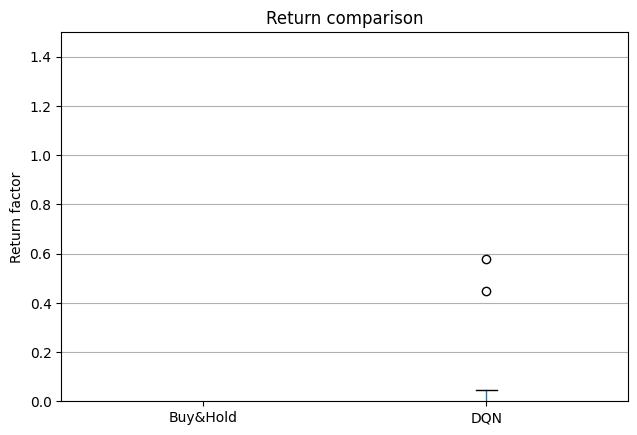

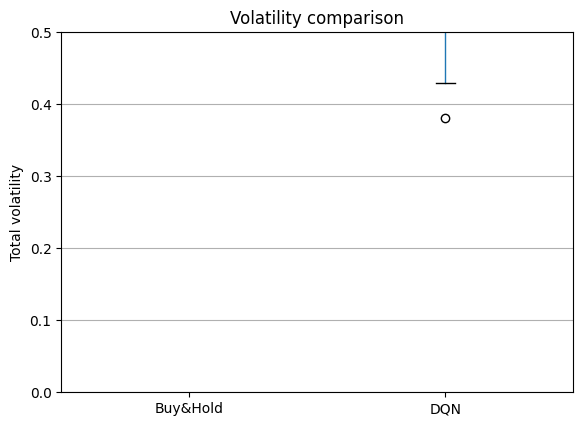

In [29]:
"""Metric box plots - probably not needed for a single configuration."""
metric_df_1 = pd.concat(result_metrics).reset_index(drop=True).fillna(-1)
metric_df_1['evaluation_mode'] = metric_df_1['evaluation_mode'].astype(int)
metric_df_1['type'] = 'DQN'
bh_row = metric_df_1.head(1).copy()
bh_row['type'] = 'Buy&Hold'
bh_row = bh_row[['return', 'total_volatility', 'type']]
metric_df_1 = metric_df_1[metric_df_1['evaluation_mode']==0].reset_index(drop=True)
metric_df_1 = metric_df_1[['return', 'total_volatility', 'type']]

#metric_df_2 = pd.concat(result_metrics_ref).reset_index(drop=True).fillna(-1)
#metric_df_2['evaluation_mode'] = metric_df_2['evaluation_mode'].astype(int)
#metric_df_2['type'] = 'DDQN'
#metric_df_2 = metric_df_2[metric_df_2['evaluation_mode']==0].reset_index(drop=True)
#metric_df_2 = metric_df_2[['return', 'total_volatility', 'type']]



comparison_df = pd.concat([bh_row, metric_df_1]).reset_index(drop=True)
plt.figure(figsize=(4, 3))
comparison_df.boxplot(column=['return'], by=['type'])
plt.suptitle('')
plt.tight_layout()
plt.title('Return comparison')
plt.xlabel('')
plt.ylabel('Return factor')
plt.ylim(0, 1.5)
plt.grid(axis='x')
plt.savefig(GRAPH_OUTPUT.joinpath("return_comparison.png"))
plt.show()
plt.close()

comparison_df.boxplot(column=['total_volatility'], by=['type'])
plt.suptitle('')
plt.title('Volatility comparison')
plt.xlabel('')
plt.ylabel('Total volatility')
plt.ylim(0, 0.5)
plt.grid(axis='x')
plt.savefig(GRAPH_OUTPUT.joinpath("volatility_comparison.png"))
plt.show()
plt.close()

In [16]:


def _plot_protocol_graphs(name, protocol_list):
    rewards_protocols = []
    loss_protocols = []
    q_protocols = []
    cap_protocols = []
    for i, p in enumerate(protocol_list):
        p = p.rename(columns={'avg_reward': f'reward_{i}', 'avg_loss': f'loss_{i}', 'avg_td_error': f'Q_{i}', 'capital':f'capital_{i}'})
        rewards_protocols.append(p[['steps', f'reward_{i}']])
        loss_protocols.append(p[['steps', f'loss_{i}']])
        q_protocols.append(p[['steps', f'Q_{i}']])
        cap_protocols.append(p[['steps', f'capital_{i}']])
    
    buy_and_hold_hurdle = capital_references[0]
    episodes = len(cap_protocols[0])
    
    rewards_df = pd.concat(rewards_protocols, axis=1)
    rewards_df = rewards_df.loc[:,~rewards_df.columns.duplicated()].copy()
    rewards_df.set_index('steps', inplace=True)
    r_m_series = rewards_df.mean(axis=1)
    r_std_series = rewards_df.std(axis=1)
    r_min = rewards_df.min(axis=1)
    r_max = rewards_df.max(axis=1)
    
    loss_df = pd.concat(loss_protocols, axis=1)
    loss_df = loss_df.loc[:,~loss_df.columns.duplicated()].copy()
    loss_df.set_index('steps', inplace=True)
    l_m_series = loss_df.mean(axis=1)
    l_std_series = loss_df.std(axis=1)
    l_min = loss_df.min(axis=1)
    l_max = loss_df.max(axis=1)
    
    q_df = pd.concat(q_protocols, axis=1)
    q_df = q_df.loc[:,~q_df.columns.duplicated()].copy()
    q_df.set_index('steps', inplace=True)
    q_m_series = q_df.mean(axis=1)
    q_std_series = q_df.std(axis=1)
    q_min = q_df.min(axis=1)
    q_max = q_df.max(axis=1)
    
    cap_df = pd.concat(cap_protocols, axis=1)
    cap_df = cap_df.loc[:,~cap_df.columns.duplicated()].copy()
    cap_df.set_index('steps', inplace=True)
    cap_m_series = cap_df.mean(axis=1)
    cap_std_series = cap_df.std(axis=1)
    cap_min = cap_df.min(axis=1)
    cap_max = cap_df.max(axis=1)
    
    # Plot values
    plt.fill_between(r_m_series.index, r_min, r_max, alpha=0.3, label='Min-Max Range', color='gray')
    plt.fill_between(r_m_series.index, r_m_series - r_std_series, r_m_series + r_std_series, alpha=0.3, label='Standard Deviation', color='green')
    plt.plot(r_m_series, label='Mean', color='lightgreen', linewidth=1)
    plt.legend(loc='lower right')
    plt.title(f"Baseline {name} reward over {episodes} Episodes")
    plt.xlabel("Steps")
    plt.ylabel("Avg Reward")
    plt.savefig(GRAPH_OUTPUT.joinpath(f"{name}_reward.png"))
    plt.show()
    plt.close()
    
    plt.fill_between(l_m_series.index, l_min, l_max, alpha=0.3, label='Min-Max Range', color='gray')
    plt.fill_between(l_m_series.index, l_m_series - l_std_series, l_m_series + l_std_series, alpha=0.8, label='Standard Deviation', color='goldenrod')
    plt.plot(l_m_series, label='Mean', color='gold', linewidth=1)
    plt.legend(loc='upper right')
    plt.title(f"Baseline {name} loss over {episodes} Episodes")
    plt.xlabel("Steps")
    plt.ylabel("Avg Loss")
    plt.savefig(GRAPH_OUTPUT.joinpath(f"{name}_loss.png"))
    plt.show()
    plt.close()
    
    plt.fill_between(q_m_series.index, q_min, q_max, alpha=0.3, label='Min-Max Range', color='grey')
    plt.fill_between(q_m_series.index, q_m_series - q_std_series, q_m_series + q_std_series, alpha=0.3, label='Standard Deviation', color='blue')
    plt.plot(q_m_series, label='Mean', color='cyan', linewidth=1)
    plt.legend(loc='lower right')
    plt.title(f"Baseline {name} Q_value over {episodes} Episodes")
    plt.xlabel("Steps")
    plt.ylabel("Avg Q_value")
    plt.savefig(GRAPH_OUTPUT.joinpath(f"{name}_q_value.png"))
    plt.show()
    plt.close()
    
    plt.fill_between(cap_m_series.index, cap_min, cap_max, alpha=0.3, label='Min-Max Range', color='grey')
    plt.fill_between(cap_m_series.index, cap_m_series - cap_std_series, cap_m_series + cap_std_series, alpha=0.3, label='Standard Deviation', color='purple')
    plt.axhline(y=buy_and_hold_hurdle, color='darkred', linestyle='--', label='Buy&Hold final capital')
    plt.plot(cap_m_series, label='Mean', color='magenta', linewidth=1)
    plt.legend(loc='upper left')
    plt.title(f"Baseline {name} achieved capital over {episodes} Episodes")
    plt.xlabel("Steps")
    plt.ylabel("Capital")
    plt.savefig(GRAPH_OUTPUT.joinpath(f"{name}_cap_value.png"))
    plt.show()
    plt.close()

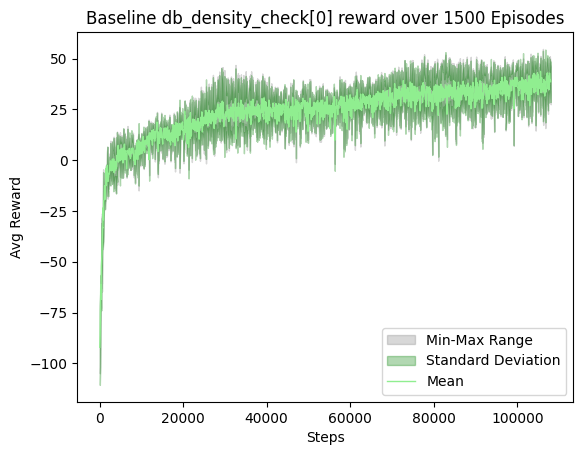

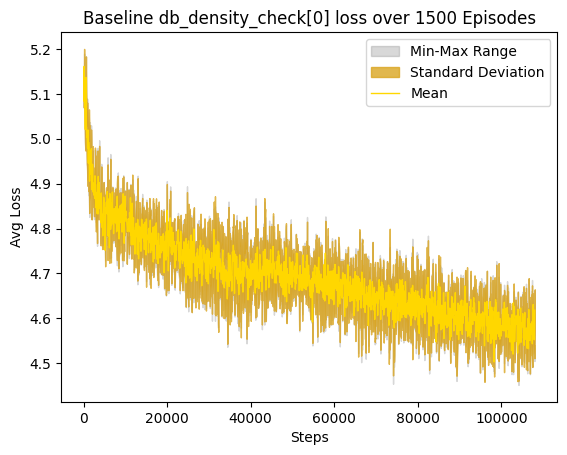

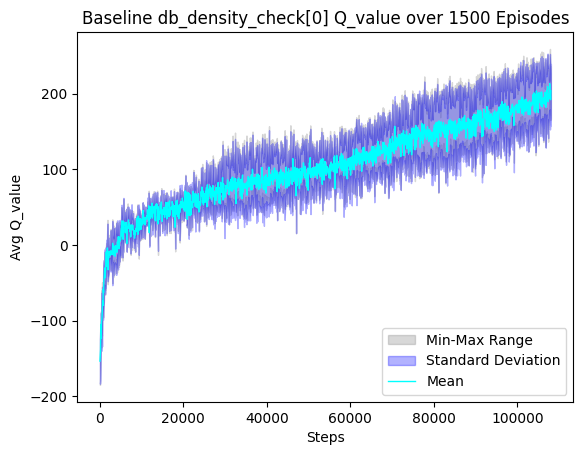

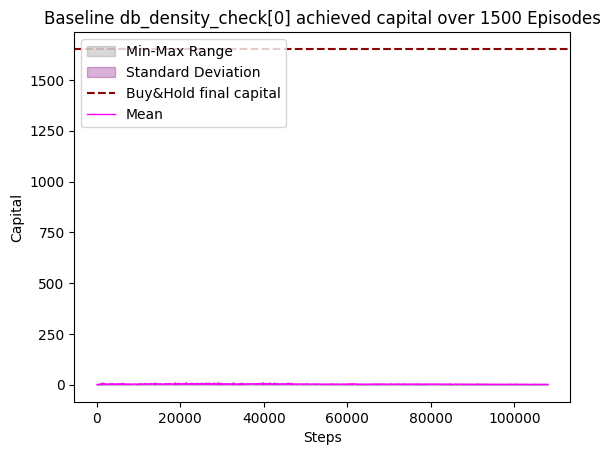

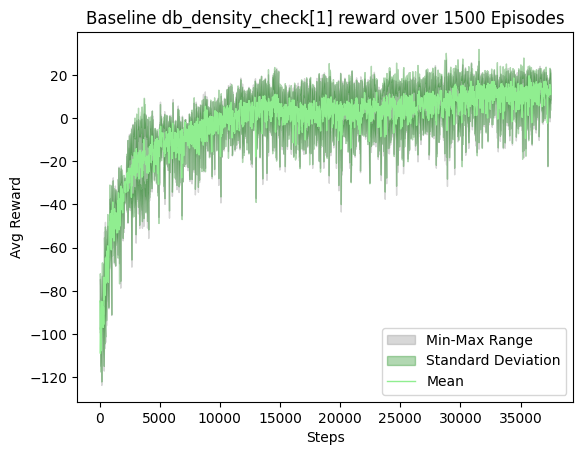

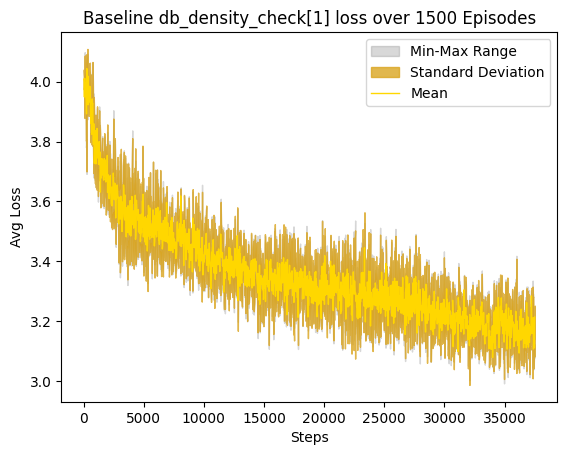

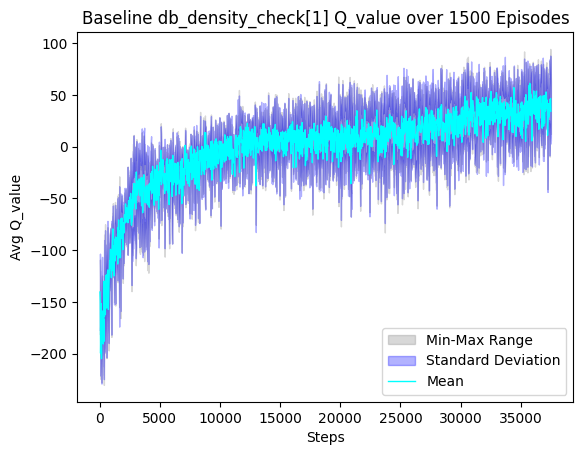

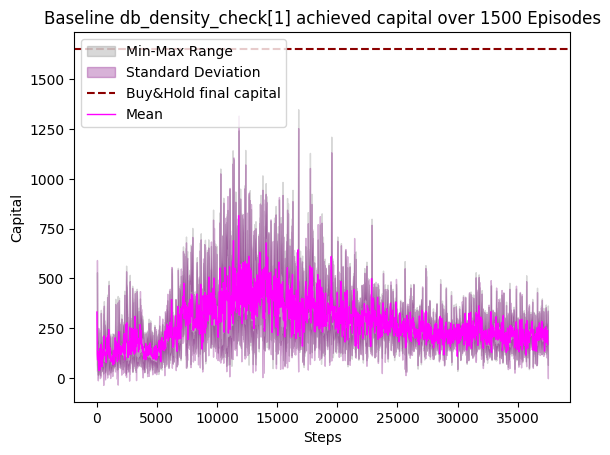

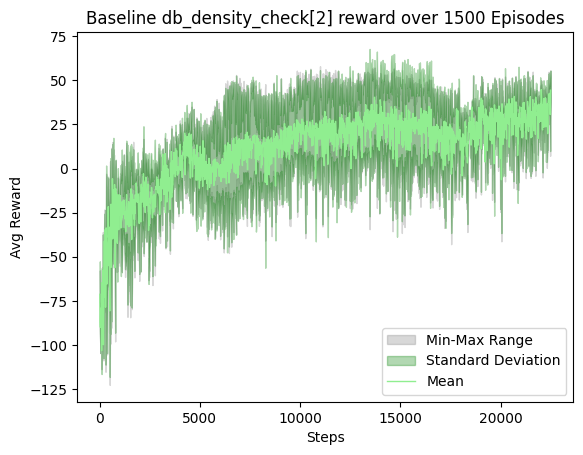

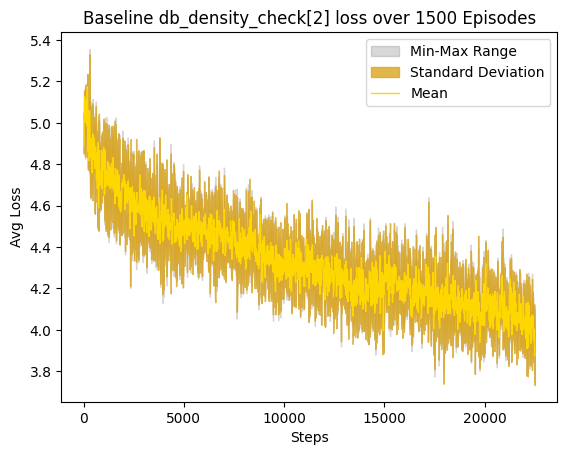

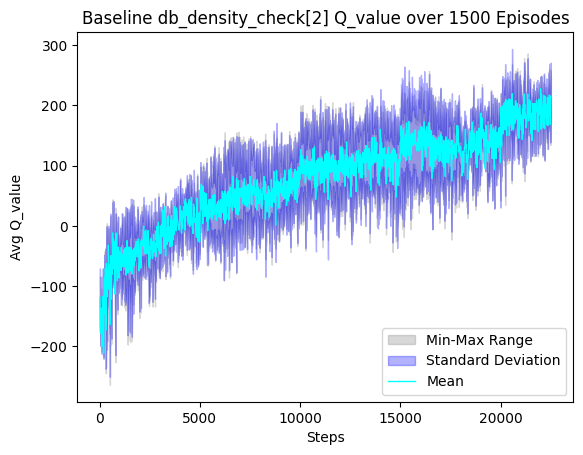

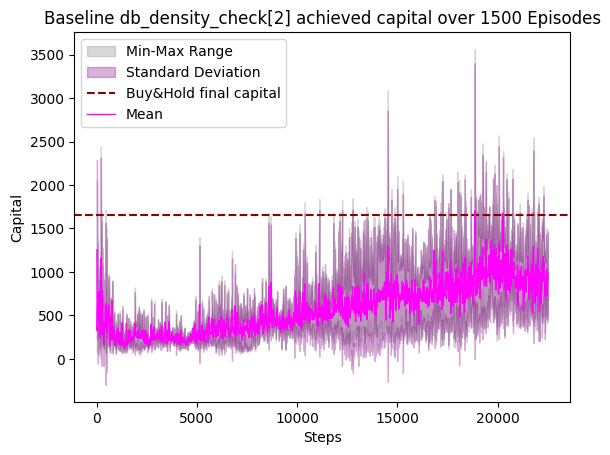

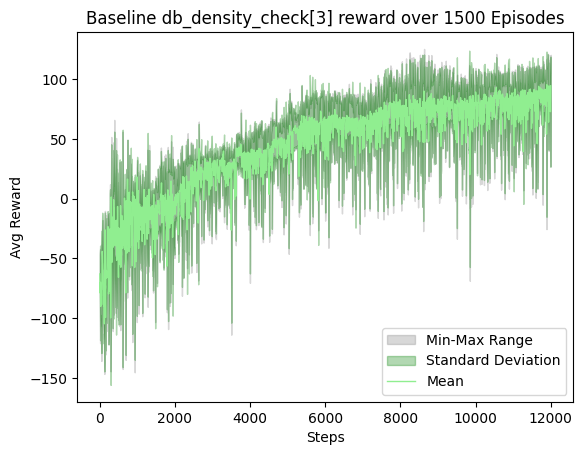

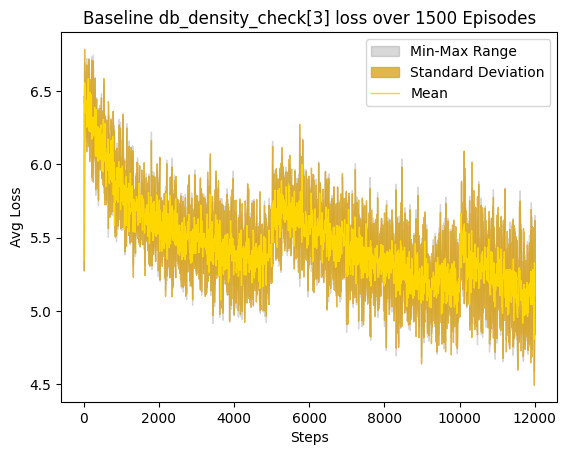

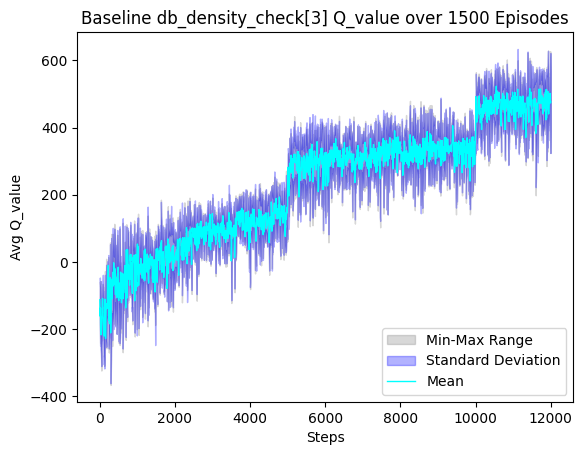

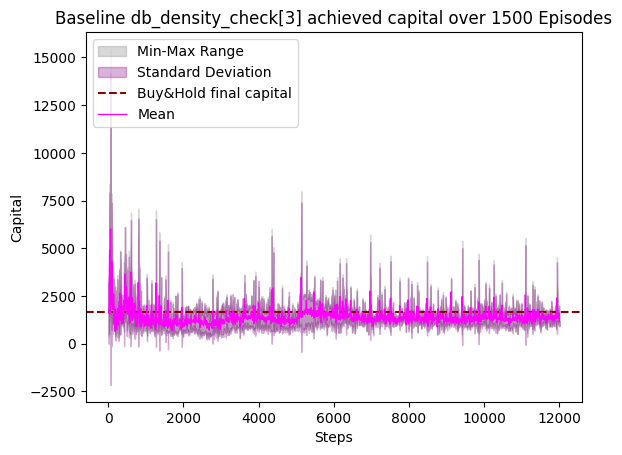

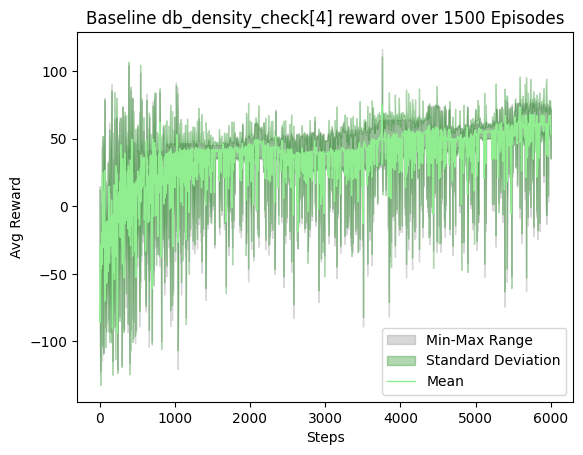

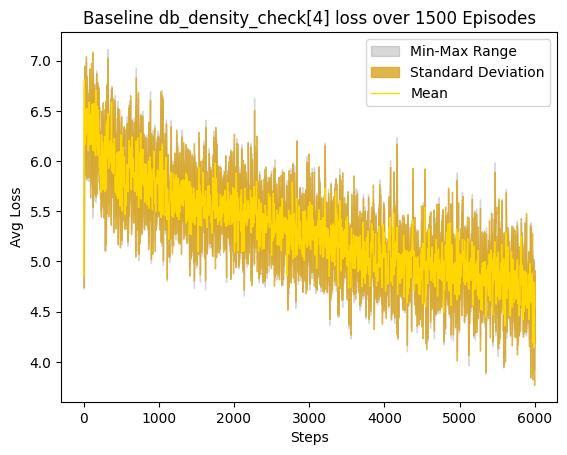

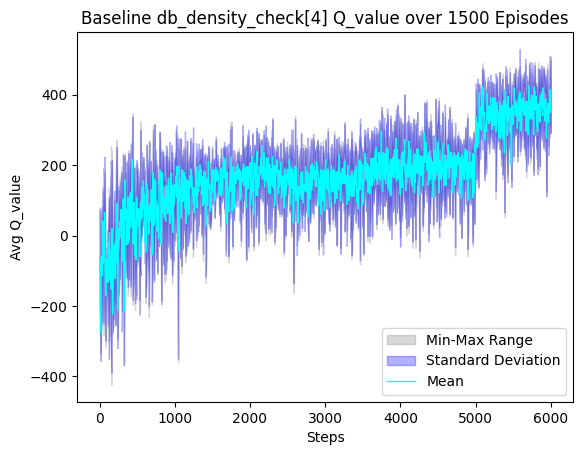

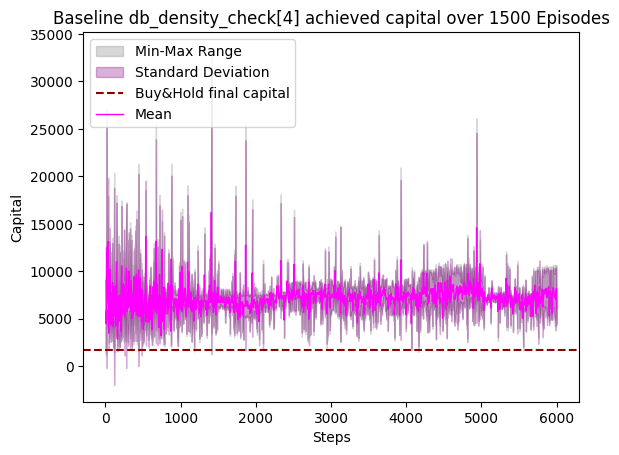

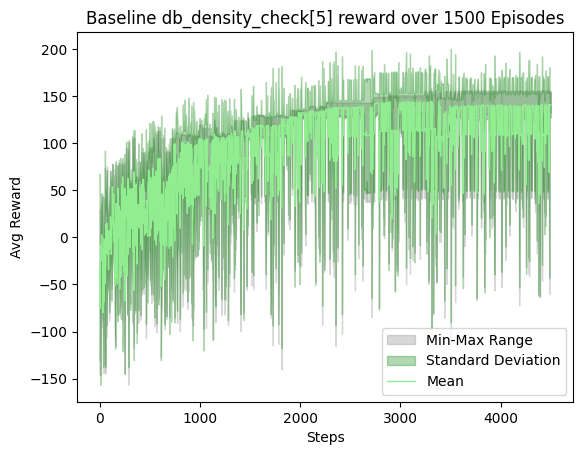

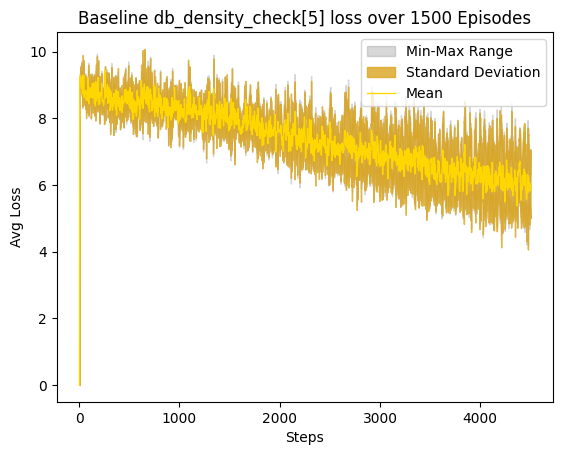

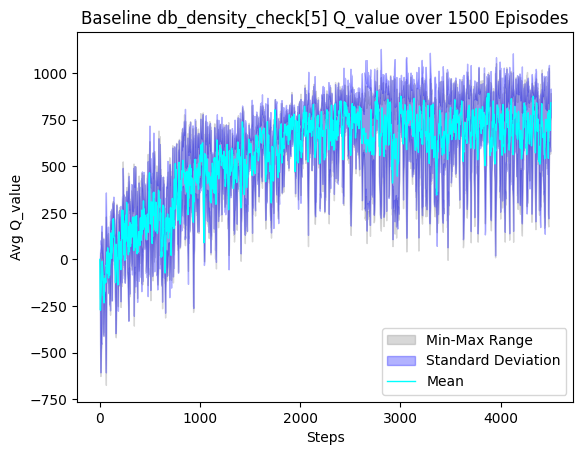

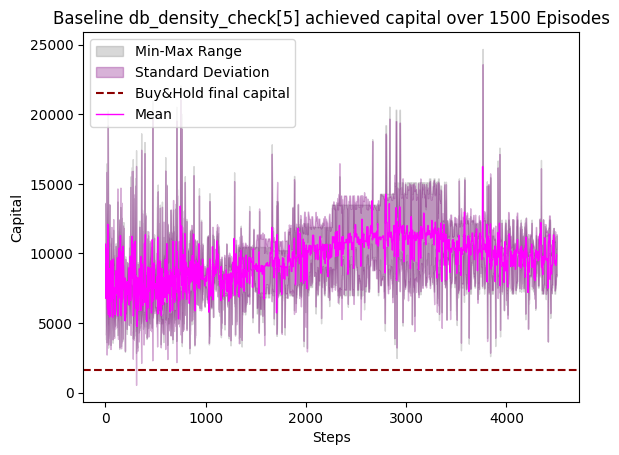

In [19]:
chunk_size = 3
chunked_protocols = []
for i in range(0, len(runtime_protocols), chunk_size):
    chunk = runtime_protocols[i:i + chunk_size]
    chunked_protocols.append(chunk)

for i, chunk in enumerate(chunked_protocols):
    _plot_protocol_graphs(f"{test_name}[{i}]", chunk)

